<a href="https://colab.research.google.com/github/KhandareAshutosh/Stock_Market_Analysis/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stock Market Analysis 📈 + Prediction using LSTM**

In [2]:
!pip install -q yfinance

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

# The tech stocks used for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab

end = datetime.now()
start = datetime(end.year -1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis = 0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-08-01,133.550003,133.690002,131.619995,131.690002,131.690002,42098500,AMAZON
2023-08-02,130.149994,130.229996,126.820000,128.210007,128.210007,51027600,AMAZON
2023-08-03,127.480003,129.839996,126.410004,128.910004,128.910004,88585200,AMAZON
2023-08-04,141.059998,143.630005,139.320007,139.570007,139.570007,152938700,AMAZON
2023-08-07,140.990005,142.539993,138.949997,142.220001,142.220001,71213100,AMAZON
2023-08-08,140.619995,140.839996,138.419998,139.940002,139.940002,51710500,AMAZON
2023-08-09,139.970001,140.320007,137.100006,137.850006,137.850006,50017300,AMAZON
2023-08-10,139.070007,140.410004,137.490005,138.559998,138.559998,58928400,AMAZON
2023-08-11,137.399994,139.330002,137.000000,138.410004,138.410004,42832100,AMAZON


**Quick note**: Using globals() is a sloppy way of setting the DataFrame names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.[link text](https://)

In [4]:
# Summary stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,159.357650,161.118088,157.749900,159.480188,158.943597,7.032183e+07
std,18.261758,18.014194,18.538899,18.249617,18.385758,2.374974e+07
min,126.010002,127.769997,124.169998,125.019997,124.488876,2.408304e+07
25%,145.815002,147.340004,144.014999,145.919998,145.274223,5.242335e+07
50%,154.789993,157.089996,153.369995,155.000000,154.394089,6.579930e+07
75%,173.025002,173.964996,171.745003,173.345001,172.891701,8.135480e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.647624e+08


In [5]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-08-15 to 2023-08-14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


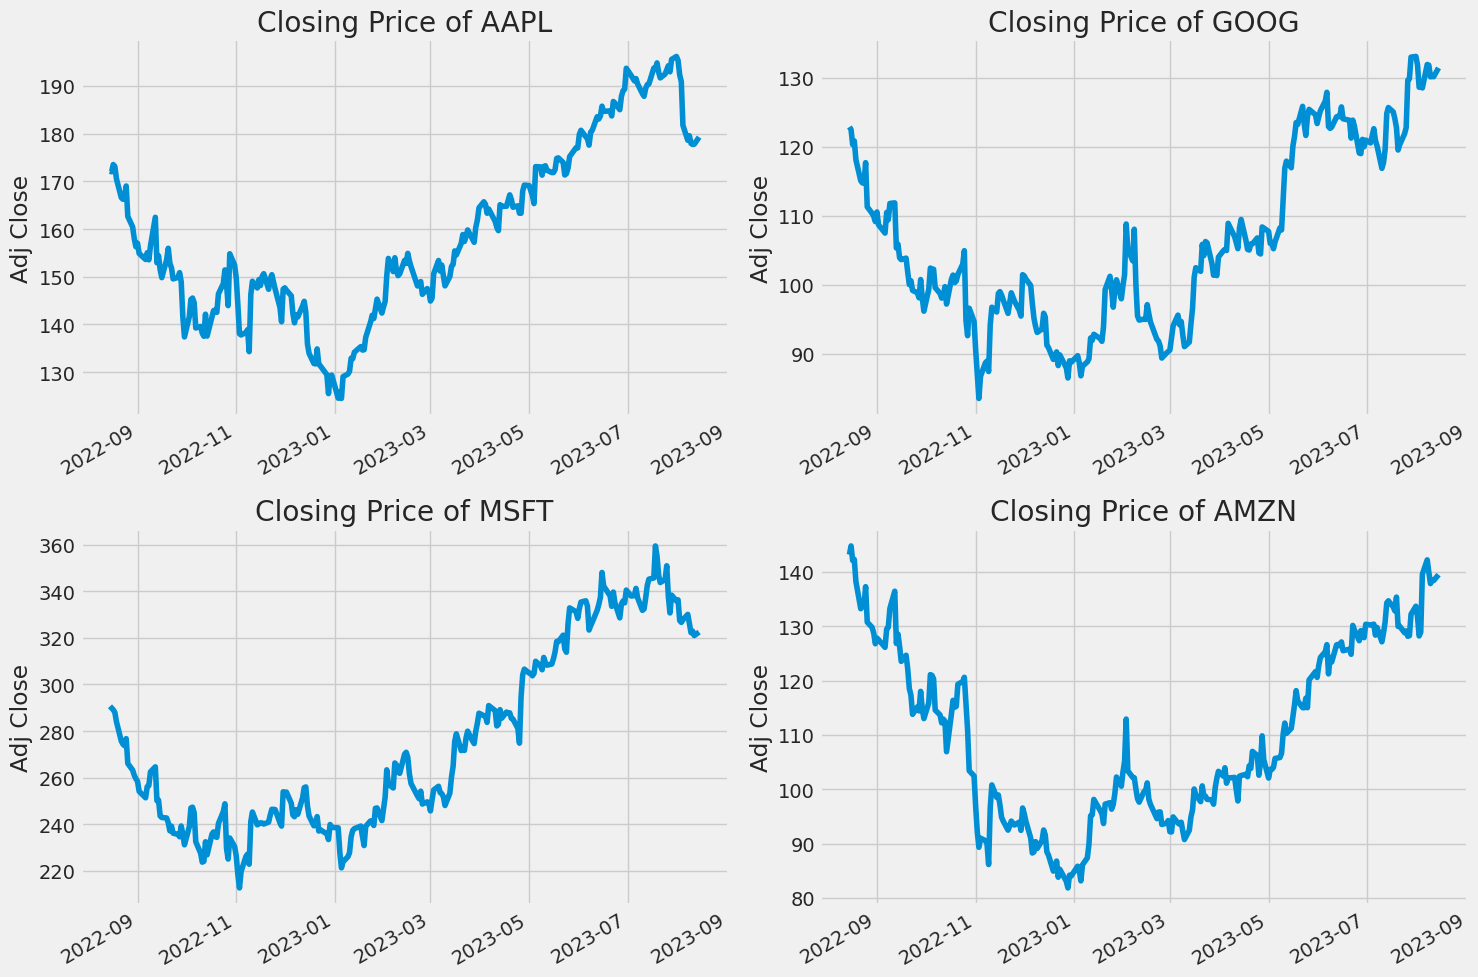

In [6]:
# Let's have a historical view of the closing price
plt.figure(figsize = (15,10))
plt.subplots_adjust(top = 1.25, bottom = 1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i-1]}")

plt.tight_layout()


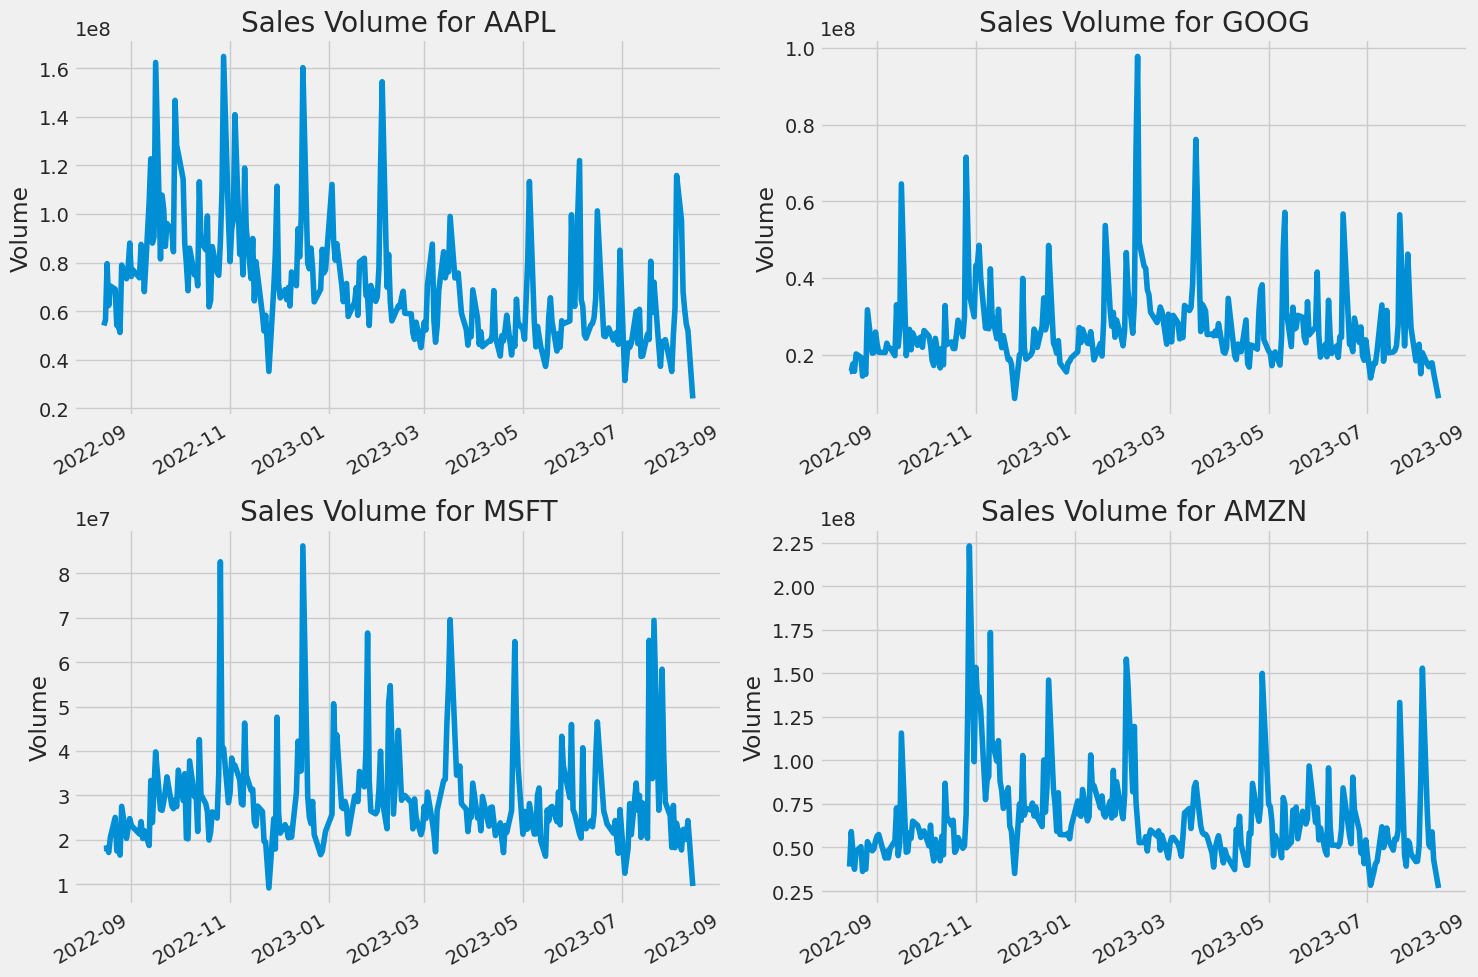

In [7]:
# Now let's plot the total volume of the stock being traded each day

plt.figure(figsize = (15,10))
plt.subplots_adjust( top = 1.25, bottom = 1.2)

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i-1]}")

plt.tight_layout()

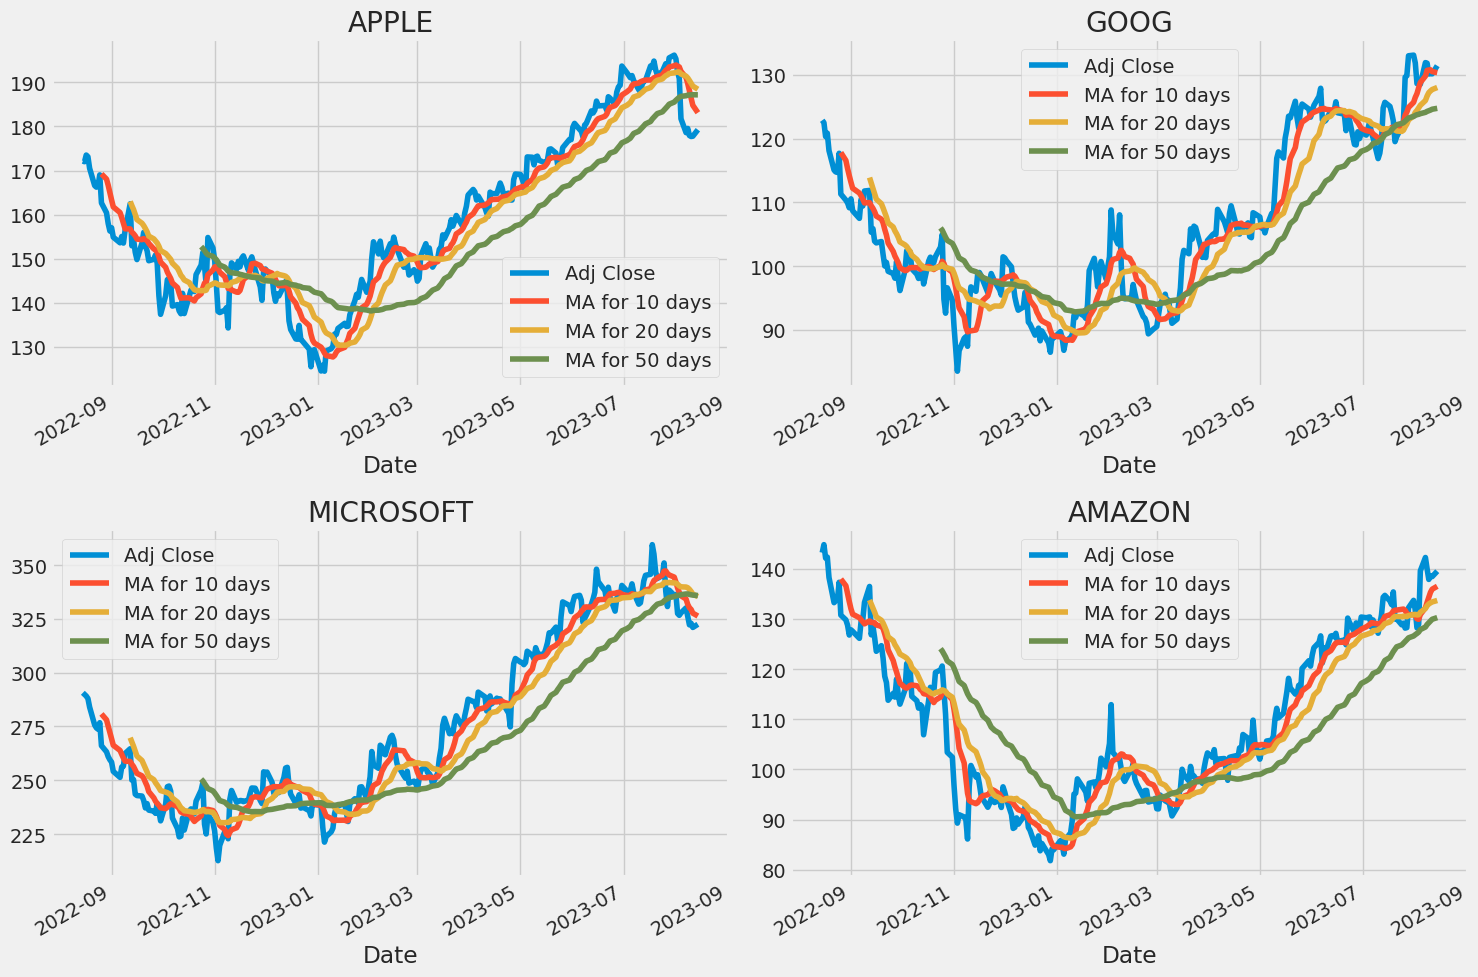

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[0,1])
axes[0,1].set_title('GOOG')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

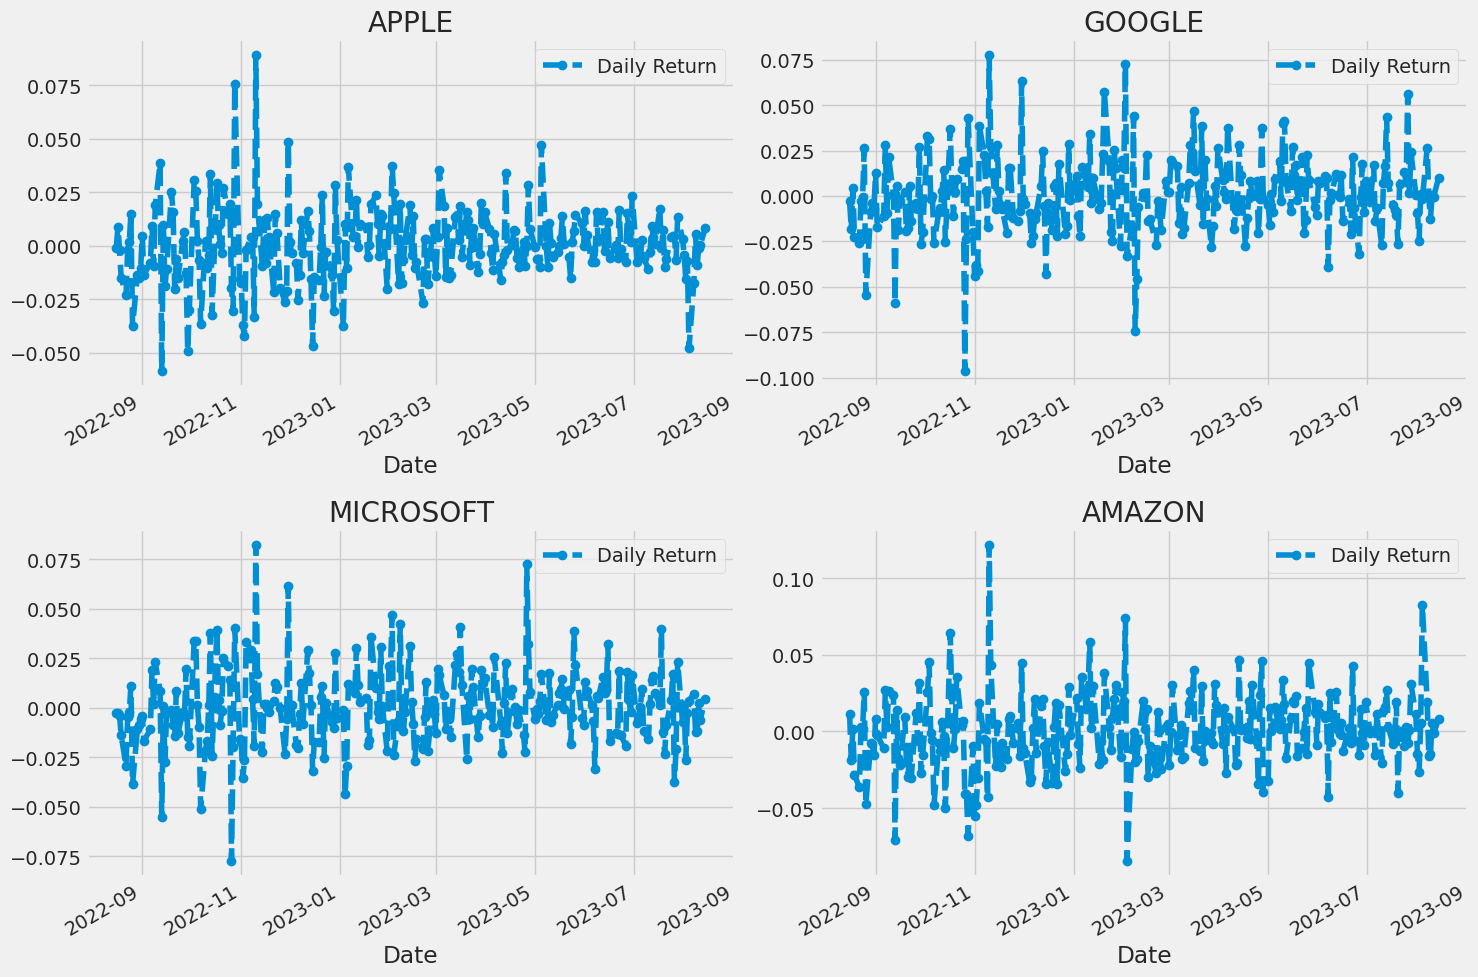

In [9]:
# We'll use pct_change to find the percentage change for each day

for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Now plotting the daily return percentage
fig, axes = plt.subplots(nrows = 2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax= axes[0,0], legend = True, linestyle = '--', marker = 'o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax = axes[0,1], legend = True, linestyle = '--', marker = 'o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax = axes[1,0], legend = True, linestyle = '--', marker = 'o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax = axes[1,1], legend = True, linestyle = '--', marker = 'o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

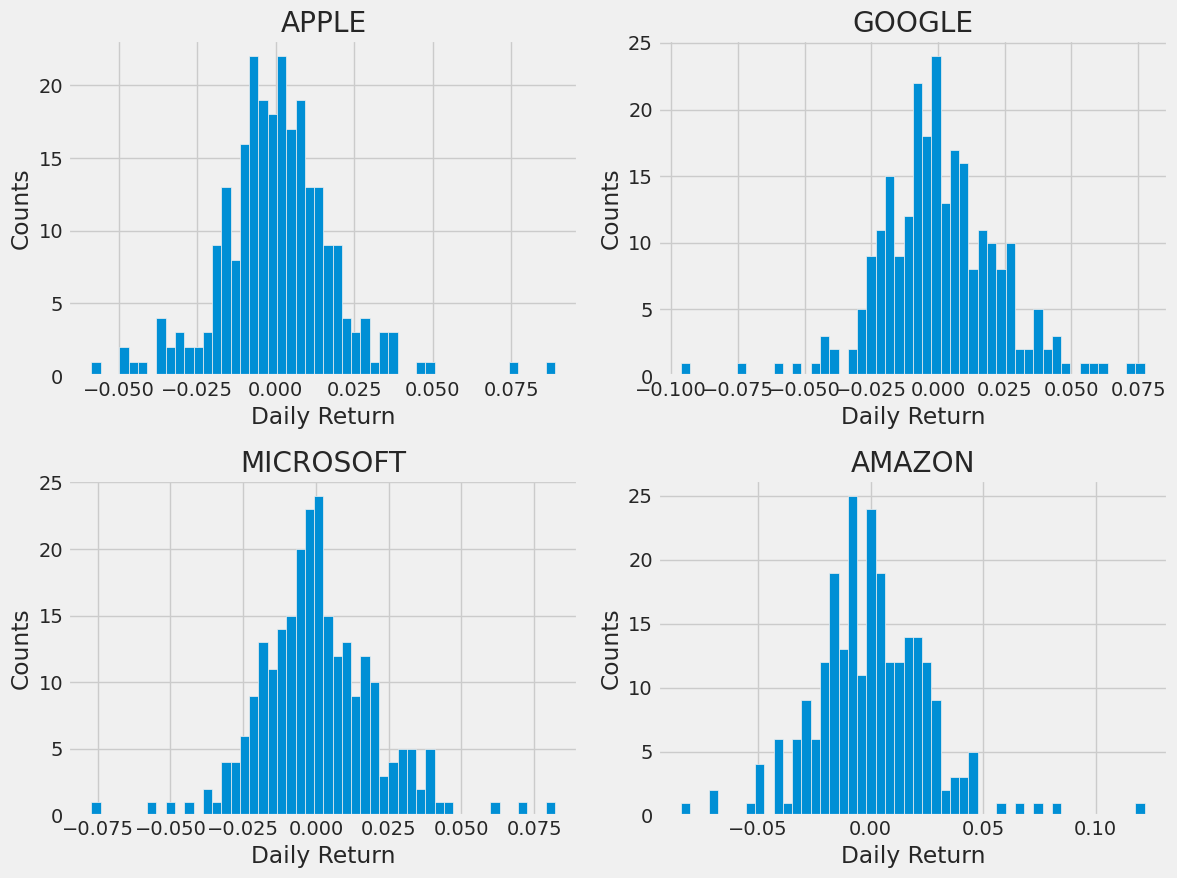

In [10]:
plt.figure(figsize = (12,9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins = 50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i-1]}')

plt.tight_layout()

In [11]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start = start, end = end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-15,NaN,NaN,NaN,NaN
2022-08-16,-0.000924,0.011175,-0.003011,-0.002590
2022-08-17,0.008785,-0.018511,-0.017876,-0.002636
2022-08-18,-0.002292,0.001407,0.004488,-0.003947
2022-08-19,-0.015102,-0.028602,-0.022671,-0.013854


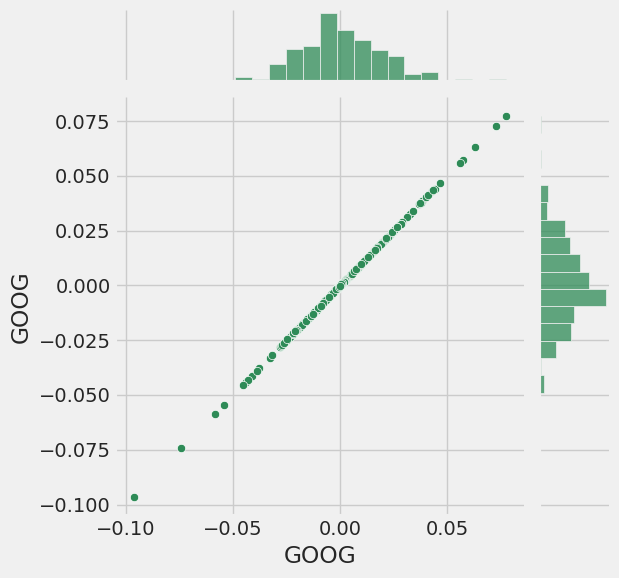

In [12]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x= 'GOOG', y= 'GOOG', data = tech_rets, kind = 'scatter', color = 'seagreen')

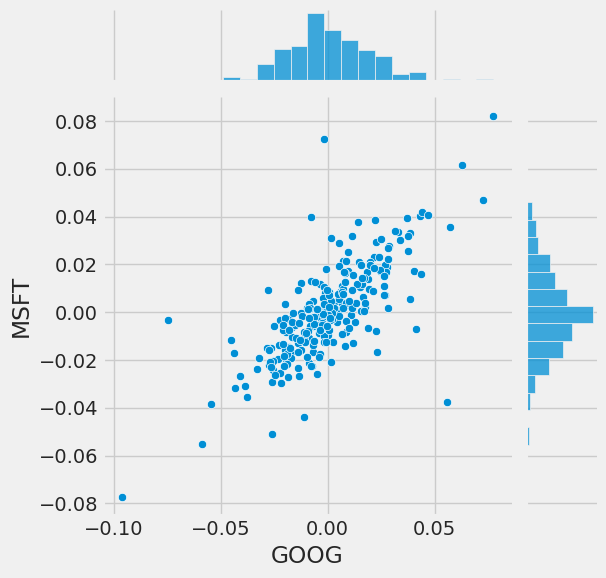

In [13]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x = 'GOOG', y='MSFT', data = tech_rets, kind = 'scatter')

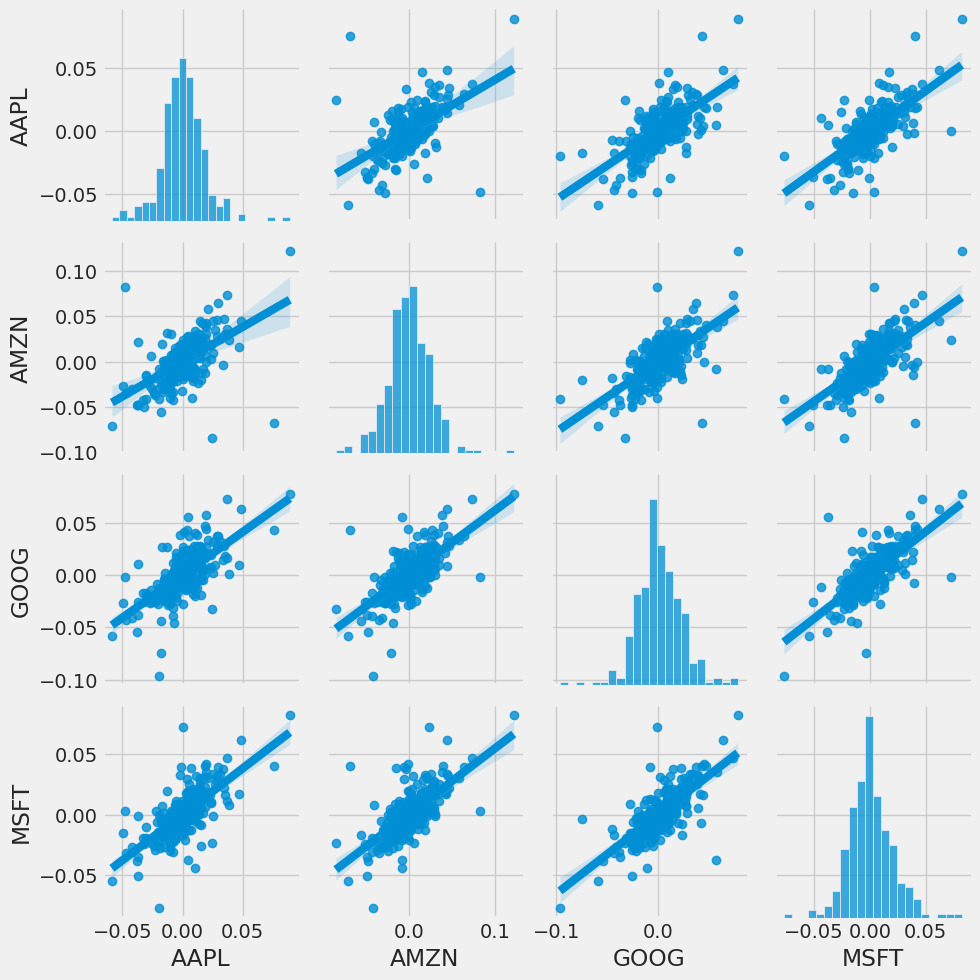

In [14]:
# We can simply call pairplot on our platform on our DataFrame for an automatic visual analysis of all comparisons

sns.pairplot(tech_rets, kind = 'reg')

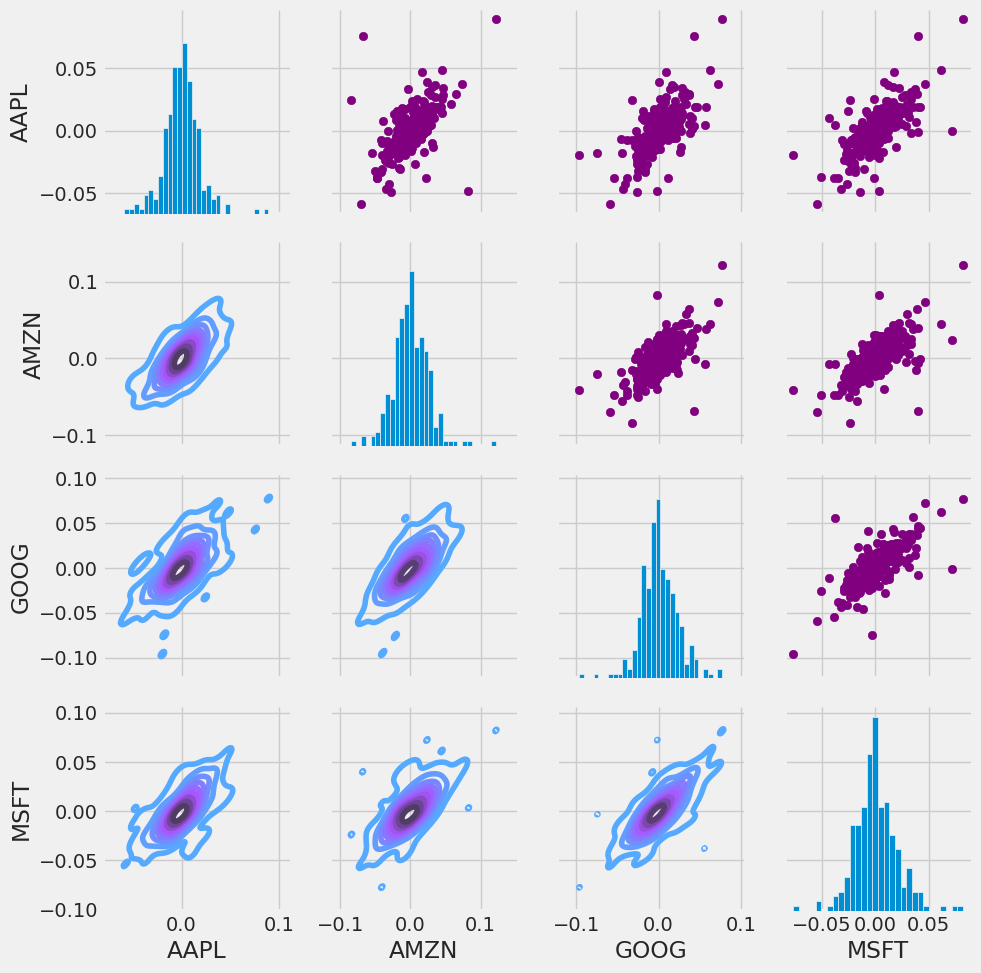

In [15]:
# Set up our figure by naming it returns_fig, call PairPlot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like
return_fig.map_upper(plt.scatter, color = 'purple')

# We can also define the lower triangle in the figure, including the plot type(kde) or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins = 30)

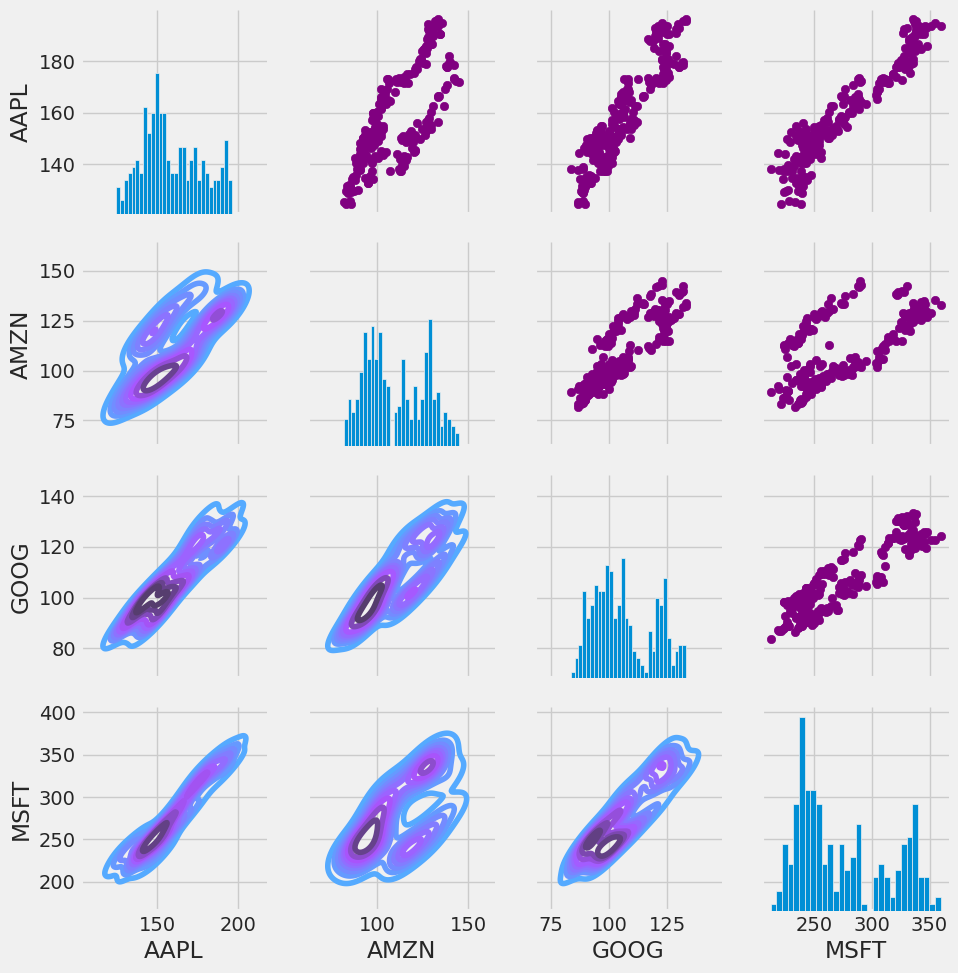

In [16]:
# set up our figure by naming it returns_fig, call PairPlot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like
returns_fig.map_upper(plt.scatter, color = 'purple')

# We can also define the lower triangle in the figure, incliuding the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins = 30)


Text(0.5, 1.0, 'Correlation of stock closing price')

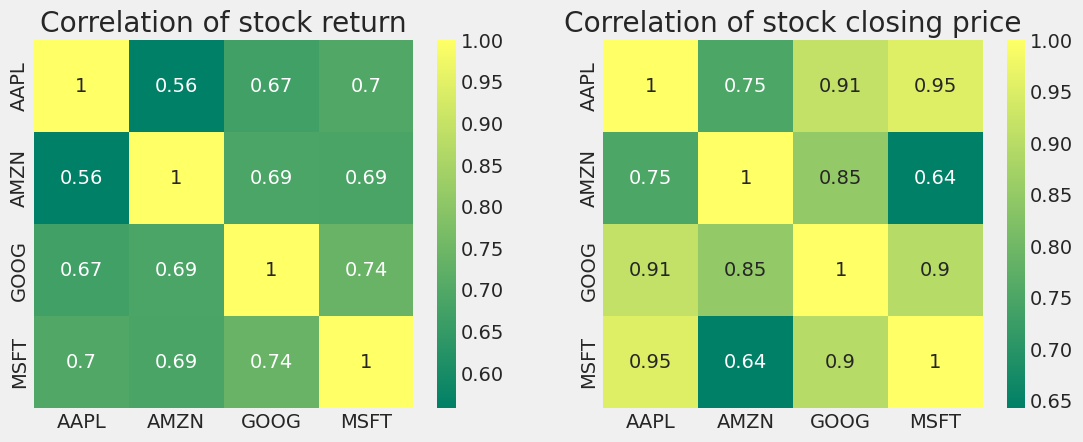

In [17]:
plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot = True, cmap = 'summer')
plt.title('Correlation of stock return')

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(), annot = True, cmap = 'summer')
plt.title('Correlation of stock closing price')

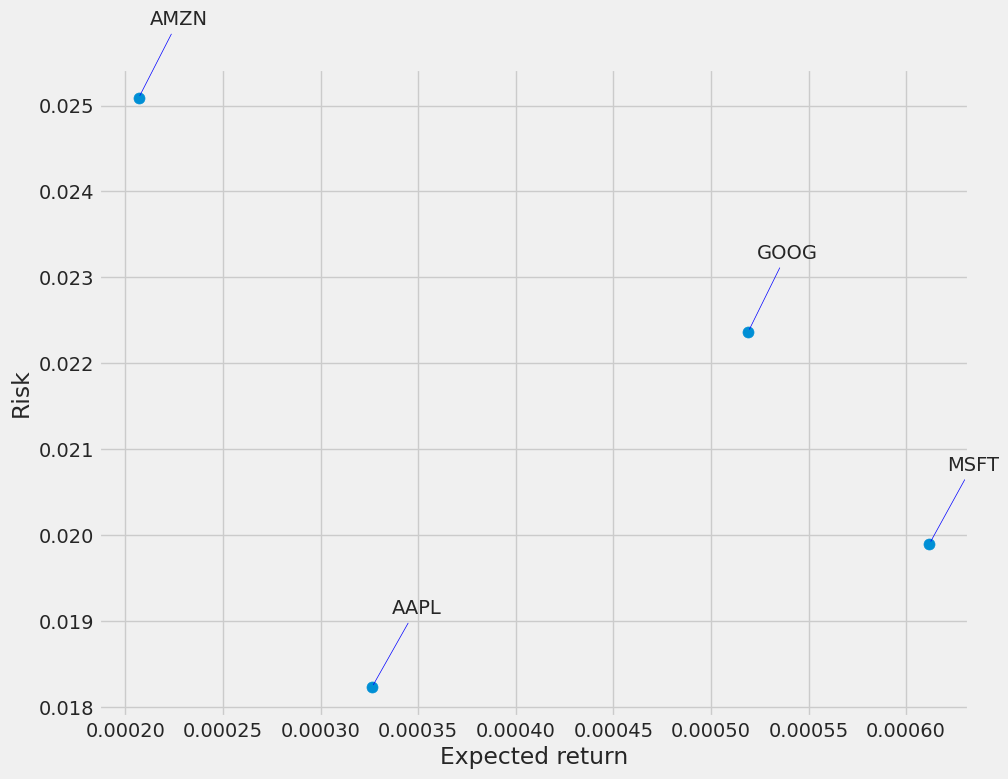

In [18]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize = (10,8))
plt.scatter(rets.mean(), rets.std(), s = area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy = (x,y), xytext = (50,50), textcoords = 'offset points', ha = 'right', va = 'bottom', arrowprops = dict(arrowstyle = '-', color = 'blue', connectionstyle = 'arc,rad = -0.3'))

In [19]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start = '2012-01-01', end = datetime.now())
# Show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466091,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533087,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672230,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804701,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784392,394024400
...,...,...,...,...,...,...
2023-08-08,179.690002,180.270004,177.580002,179.800003,179.557526,67823000
2023-08-09,180.869995,180.929993,177.009995,178.190002,177.949707,60378500
2023-08-10,179.479996,180.750000,177.600006,177.970001,177.729996,54686900


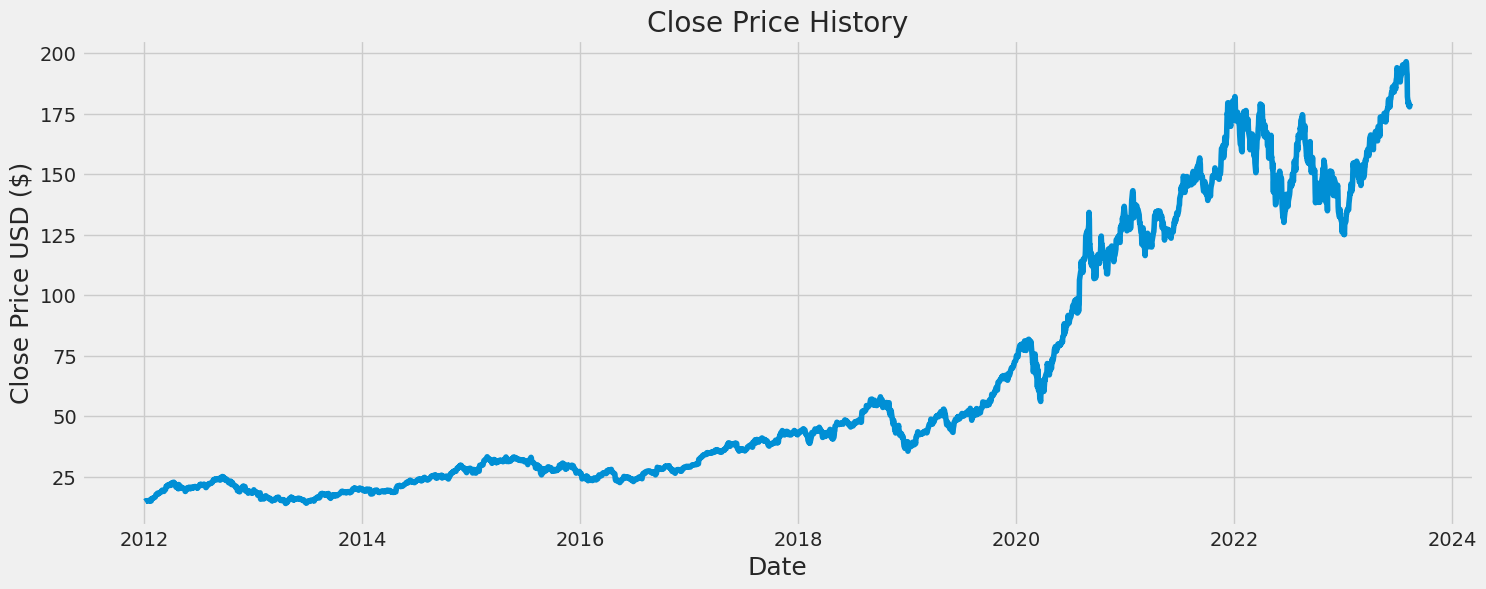

In [20]:
plt.figure(figsize = (16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)' ,fontsize = 18)
plt.show()

In [21]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset)*.95))

training_data_len

2776

In [22]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.89874113],
       [0.8977548 ],
       [0.90553609]])

In [23]:
# Creating the training dataset and the scaled training dataset
train_data = scaled_data[0:int(training_data_len), :]

#Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size = 1, epochs=1)

2716/2716 [==============================] - 115s 41ms/step - loss: 0.0011


In [25]:
# Create the testing data set
# Create a new array conntaining scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test= []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)

rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

5/5 [==============================] - 1s 37ms/step


7.943472317437388

In [32]:
from sklearn.metrics import r2_score
#R-squared (R²) / Coefficient of Determination:
#This metric indicates the proportion of the variance in the dependent variable that is explained by the independent variables.
#It ranges from 0 to 1, with higher values indicating better fit.

r2 = r2_score(y_test, predictions)
r2

0.7764691963578008

<ipython-input-30-c0acd1a24048>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


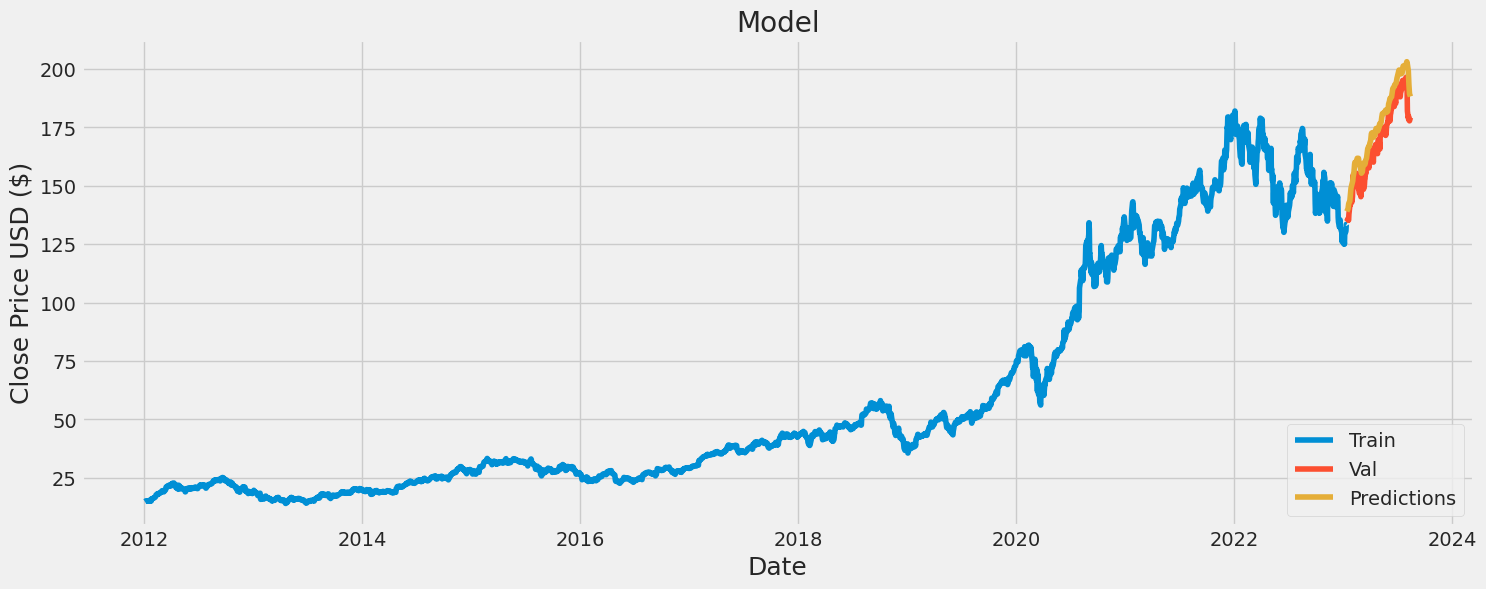

In [30]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualise the data
plt.figure(figsize = (16,6))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [31]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-01-13,134.759995,139.023880
2023-01-17,135.940002,140.178360
2023-01-18,135.210007,141.334290
2023-01-19,135.270004,142.118927
2023-01-20,137.869995,142.624527
...,...,...
2023-08-08,179.800003,196.096344
2023-08-09,178.190002,193.387436
2023-08-10,177.970001,191.099167
